<a href="https://colab.research.google.com/github/Nicole-Perrotta/AILabProj-Live_ASL_Classification/blob/main/B%26W_ASL_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training of the dataset in black and white without fine tuning 

**Enabling and testing the GPU**

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**Importing libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Mounting the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Processing the data**

In [ ]:
!unzip '/content/drive/MyDrive/dataset_B&W.zip' 

Output streaming troncato alle ultime 5000 righe.
  inflating: dataset_B&W/Y/19.jpg    
  inflating: dataset_B&W/Y/190.jpg   
  inflating: dataset_B&W/Y/1900.jpg  
  inflating: dataset_B&W/Y/1901.jpg  
  inflating: dataset_B&W/Y/1902.jpg  
  inflating: dataset_B&W/Y/1903.jpg  
  inflating: dataset_B&W/Y/1904.jpg  
  inflating: dataset_B&W/Y/1905.jpg  
  inflating: dataset_B&W/Y/1906.jpg  
  inflating: dataset_B&W/Y/1907.jpg  
  inflating: dataset_B&W/Y/1908.jpg  
  inflating: dataset_B&W/Y/1909.jpg  
  inflating: dataset_B&W/Y/191.jpg   
  inflating: dataset_B&W/Y/1910.jpg  
  inflating: dataset_B&W/Y/1911.jpg  
  inflating: dataset_B&W/Y/1912.jpg  
  inflating: dataset_B&W/Y/1913.jpg  
  inflating: dataset_B&W/Y/1914.jpg  
  inflating: dataset_B&W/Y/1915.jpg  
  inflating: dataset_B&W/Y/1916.jpg  
  inflating: dataset_B&W/Y/1917.jpg  
  inflating: dataset_B&W/Y/1918.jpg  
  inflating: dataset_B&W/Y/1919.jpg  
  inflating: dataset_B&W/Y/192.jpg   
 extracting: dataset_B&W/Y/1920.jpg  


In [ ]:
data_dir = '/content/dataset_B&W'
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

87000


**Transforming the data into black and white**

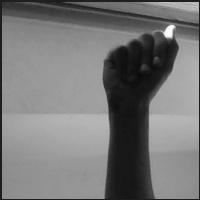

In [ ]:
A_letter = list(data_dir.glob('A/*'))
PIL.Image.open(str(A_letter[0]))

In [ ]:
!mkdir /content/drive/MyDrive/dataset_B&W/A
#!rm -rf /content/drive/MyDrive/dataset_B&W/A

In [ ]:
for i in range(3000):
  PIL.Image.open(str(A_letter[i])).convert("L").save('/content/drive/MyDrive/dataset_B&W/A/'+str(i)+'.jpg')

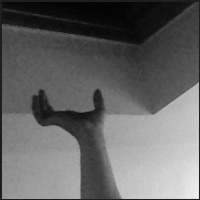

In [ ]:
PIL.Image.open(str(A_letter[0])).convert("L") #gray scale image converter

**Creating the dataset**

In [ ]:
batch_size = 8 # tried with 16
img_height = 75 # tried with 32, 128
img_width = 75 # tried with 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  label_mode="categorical", #so the labels are not ordered integers, but tensors
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 87000 files belonging to 29 classes.
Using 69600 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  label_mode="categorical",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


**Creating a test set from validation dataset**

In [ ]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 5)
val_ds = val_ds.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_ds))

Number of validation batches: 1740
Number of test batches: 435


**Displaying the names of the classes**

In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


**Data visualisation**

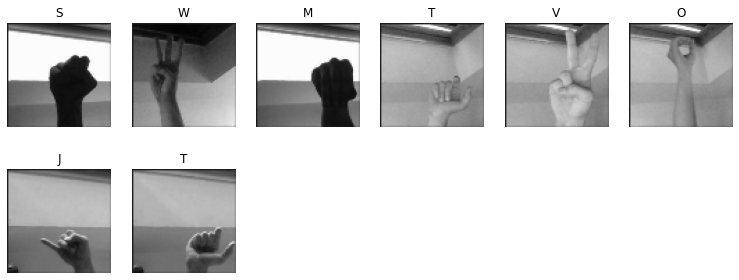

In [ ]:
#case 0: labels as integers
"""
plt.figure(figsize=(13, 13))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(5, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
"""

#case 1: labels as tensors
plt.figure(figsize=(13, 13))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(5, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.math.argmax(labels[i])])
    plt.axis("off")

**Checking the image_batch shape of default data 200x200x3(channels)**

In [ ]:
for image_batch, class_names in train_ds: 
  print(image_batch.shape)
  print(class_names)
  break

(8, 75, 75, 3)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]], shape=(8, 29), dtype=float32)


**Buffered prefetching**

It is useful because you can yield data from disk without having I/O become blocking.

These are two important methods you should use when loading data:

`Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch` overlaps data preprocessing and model execution while training.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Data augmentation**

Consists of a set of data manipulation and transformation techniques that aim to expand the size of the starting dataset, in order to guarantee the feasibility of Machine Learning and Advanced Analytics projects even in situations where there is no the possibility of collecting new data to reach the minimum amount of information necessary to start projects.

In [ ]:
#case 0: Flip and Rotation
"""
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'), #images turn specularly randomly
  tf.keras.layers.RandomRotation(0.2),
"""

#case 1: Flip, Rotation, Crop, Contrast and Zoom
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(factor=(-0.2, 0.3),fill_mode="reflect"),
  tf.keras.layers.RandomCrop(img_height, img_width),
  tf.keras.layers.RandomContrast(0.2),
  tf.keras.layers.RandomZoom(0.2)])

**Creating the base model**

In [ ]:
"""ResNet50V2
base_model = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(img_height, img_width, 3),
                                                        include_top=False,
                                                        weights='imagenet',
                                                        pooling='none',)
"""
""""MobnileNetV2
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(img_height, img_width, 3),
                                                        include_top=False,
                                                        weights='imagenet',
                                                        pooling='none',)
"""
""""MobnileNet
base_model = tf.keras.applications.mobilenet.MobileNet(input_shape=(img_height, img_width, 3),
                                                        include_top=False,
                                                        weights='imagenet',
                                                        pooling='none',)
"""
""""EfficientNet
base_model = tf.keras.applications.efficientnet.EfficientNetB0(input_shape=(img_height, img_width, 3),
                                                        include_top=False,
                                                        pooling=None,)
"""
base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=(img_height, img_width, 3),
                                                        include_top=False,
                                                        weights='imagenet',
                                                        pooling=None,)

base_model.trainable = True
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_188 (Conv2D)            (None, 37, 37, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 37, 37, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_188 (Activation)    (None, 37, 37, 32)   0           ['batch_normalization_

**Creating the global_average_layer and the prediction_layer**

In [ ]:
with tf.device('/gpu:0'):
  image_batch, label_batch = next(iter(train_ds))
  feature_batch = base_model(image_batch)
  print(label_batch.shape)
  print(feature_batch.shape)

(8, 29)
(8, 1, 1, 2048)


In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(8, 2048)


In [ ]:
prediction_layer = tf.keras.layers.Dense(num_classes, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(8, 29)


**Modifying pre-processing according to the used network**

In [ ]:
"""
ResnNet50V2
preprocess_input = tf.keras.applications.resnet_v2.preprocess_input
MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
MobileNet
preprocess_input = tf.keras.applications.mobilenet.preprocess_input
EfficientNetB0
preprocess_input = tf.keras.applications.efficientnet.preprocess_input #placeholder
InceptionV3"""
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

**Finishing the construction of the model**

In [ ]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
print(outputs)
model = tf.keras.Model(inputs, outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 29), dtype=tf.float32, name=None), name='dense/Softmax:0', description="created by layer 'dense'")


**Displaying the structure of the model**

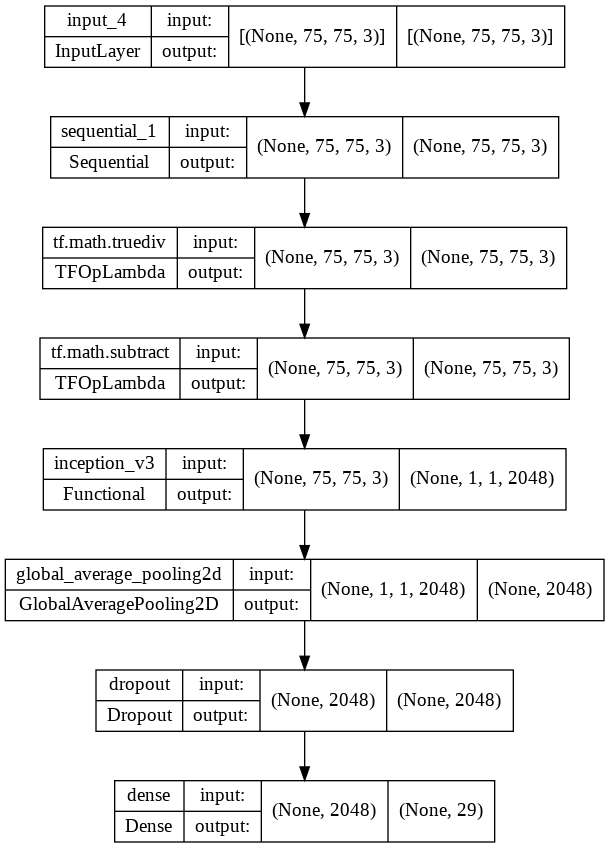

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

**Compiling the model**

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
len(model.trainable_variables)

190

**Early stopping**

It halts the training of the network at the right time

In [ ]:
early_stop = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=1e-2,
        patience=10,
        verbose=1
    )
]

**Training of the model**

In [ ]:
def adapt_learning_rate(epoch):
    return 0.001 * (epoch + 1)

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(adapt_learning_rate)


In [ ]:
initial_epochs = 10
import time
start = time.time()
with tf.device('/gpu:0'):
    history = model.fit(
        train_ds, 
        validation_data=val_ds,
        epochs=20,
        callbacks=[early_stop,lr_scheduler],
    )
stop = time.time()
print(f'Training on GPU took: {(stop-start)/60} minutes')

Epoch 1/20
8700/8700 [==============================] - 406s 45ms/step - loss: 3.6949 - accuracy: 0.0347 - val_loss: 1143.8973 - val_accuracy: 0.0349 - lr: 0.0010
Epoch 2/20
8700/8700 [==============================] - 346s 40ms/step - loss: 3.8331 - accuracy: 0.0383 - val_loss: 436.7847 - val_accuracy: 0.0340 - lr: 0.0020
Epoch 3/20
8700/8700 [==============================] - 347s 40ms/step - loss: 3.4113 - accuracy: 0.0492 - val_loss: 437.2566 - val_accuracy: 0.0710 - lr: 0.0030
Epoch 4/20
8700/8700 [==============================] - 345s 40ms/step - loss: 3.2860 - accuracy: 0.0604 - val_loss: 1419.1788 - val_accuracy: 0.0703 - lr: 0.0040
Epoch 5/20
8700/8700 [==============================] - 348s 40ms/step - loss: 3.2643 - accuracy: 0.0658 - val_loss: 260.9558 - val_accuracy: 0.0953 - lr: 0.0050
Epoch 6/20
8700/8700 [==============================] - 343s 39ms/step - loss: 3.3029 - accuracy: 0.0548 - val_loss: 5516.3892 - val_accuracy: 0.0345 - lr: 0.0060
Epoch 7/20
8700/8700 [===

**Learning curves of the training and validation accuracy/loss**



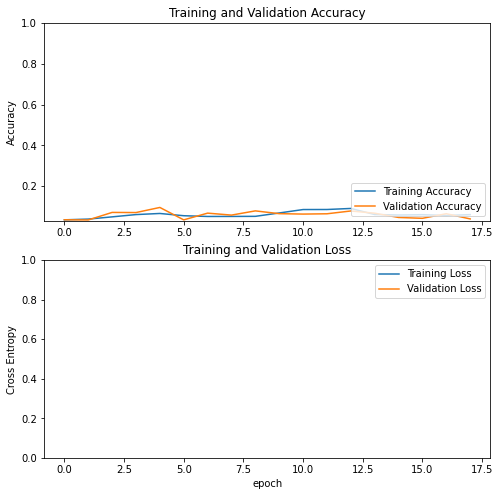

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

**Evaluation of the model with the test dataset**

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

435/435 [==============================] - 15s 34ms/step - loss: 1686041.6250 - accuracy: 0.0440
Test accuracy : 0.04396551847457886


**Saving and downloading the model**

In [ ]:
model.save("model_8_75Inception_BW")

In [ ]:
!zip -r model_8_75Inception_BW.zip /content/model_8_75Inception_BW 
from google.colab import files
files.download("/content/model_8_75Inception_BW.zip")

  adding: content/model_8_75Inception_BW/ (stored 0%)
  adding: content/model_8_75Inception_BW/variables/ (stored 0%)
  adding: content/model_8_75Inception_BW/variables/variables.data-00000-of-00001 (deflated 51%)
  adding: content/model_8_75Inception_BW/variables/variables.index (deflated 79%)
  adding: content/model_8_75Inception_BW/keras_metadata.pb (deflated 96%)
  adding: content/model_8_75Inception_BW/saved_model.pb (deflated 92%)
  adding: content/model_8_75Inception_BW/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Loading and checking the model**

In [ ]:
!unzip '/content/model_875Inception_BW.zip' 

unzip:  cannot find or open /content/model_8_64EfficientNetB0_BW.zip, /content/model_8_64EfficientNetB0_BW.zip.zip or /content/model_8_64EfficientNetB0_BW.zip.ZIP.


In [ ]:
loaded_model = tf.keras.models.load_model("model_8_64EfficientNetB0_BW")
loss, accuracy = loaded_model.evaluate(test_ds)
print('Test accuracy :', accuracy)

435/435 [==============================] - 8s 15ms/step - loss: 0.0344 - accuracy: 0.9899
Test accuracy : 0.9899425506591797


**Prediction of the hand sign language on some images of the test dataset**



[[ 10.00718    -4.918674   -5.893637  -10.676735   -5.6051693  -7.4019356
   -3.1528225  -2.4994678  -5.3330817  -3.3329084  -7.845991   -9.900064
   -6.891014   -5.9564433 -10.016094   -7.0723925  -6.294651   -6.3685784
   -4.1831756  -5.6044526  -6.196501   -8.817969   -7.6087217  -1.0575829
   -8.26336    -2.843968   -5.828731  -10.672127  -16.423046 ]]


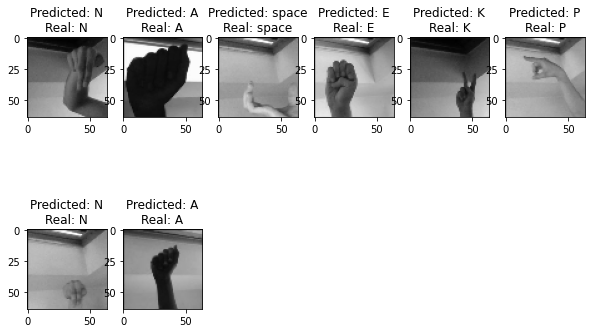

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 6, i + 1)
    img = images[i].numpy().astype("uint8")
    
    
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = loaded_model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
print("\n")
    plt.title("Predicted: " + class_names[np.argmax(score)] + "\n" + "Real: " + class_names[labels[i]])
    plt.imshow(img)
  print(predictions)